<a href="https://colab.research.google.com/github/JD39/Processing-of-precipitation-data-over-Rio-Negro-basin/blob/main/Correlacion_Cruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
from scipy.stats import mode
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
import seaborn as sns
import scipy

from numpy.random import seed

seed_number = 28
seed(seed_number)

np.random.seed(seed_number)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd'/content/drive/MyDrive/PhD/CAP-425-2021'

/content/drive/MyDrive/PhD/CAP-425-2021


Biblioteca para visualização de correlações

In [4]:
!pip install biokit

     |████████████████████████████████| 162 kB 5.2 MB/s 
     |████████████████████████████████| 47 kB 3.9 MB/s 
     |████████████████████████████████| 202 kB 40.4 MB/s 
     |████████████████████████████████| 2.3 MB 37.9 MB/s 
     |████████████████████████████████| 47 kB 4.4 MB/s 
     |████████████████████████████████| 44 kB 2.4 MB/s 
     |████████████████████████████████| 144 kB 73.2 MB/s 
     |████████████████████████████████| 5.8 MB 21.3 MB/s 
     |████████████████████████████████| 251 kB 59.8 MB/s 
     |████████████████████████████████| 127 kB 59.9 MB/s 
  Created wheel for biokit: filename=biokit-0.5.0-py3-none-any.whl size=177149 sha256=8371e7a652c2752dd92d5cd969e56bc523962105f436b3f8ffad3e6a86fab630
  Stored in directory: /root/.cache/pip/wheels/2f/30/fe/0a5e0df22f6ac201067237923fbad60309bb6f7dc68ff6b346
  Created wheel for bioservices: filename=bioservices-1.8.2-py3-none-any.whl size=229884 sha256=42face256c42bfa78ddab1b0eb8c690e37eb1a7c563b75ac5b3cfa630bf139b2
  Stored

Lendo arquivo de niveis

In [5]:
import pandas as pd

niveis = pd.read_csv("18_station_level.csv", sep=',',  index_col=0)
# niveis[['nivel_Olaria']]
niveis=niveis[['Manuel_Diaz_level', 
           'Cuñapirú_level',
           'Coelho_level',
           'Paso_de_las_Toscas_level',
           'Laguna_I_level', 
           'Laguna_II_level', 
           'Mazagano_level',
           'Aguiar_level', 
           'Pereira_level',
           'San_Gregorio_level',
           'Paso_de_los_toros_level', 
          'Salsipuedes_level',
          'Sarandi_del_Yi_level',	
          'Polanco_level',
          'Durazno_level', 
          'Paso_de_Lugo_level', 
          'Mercedes_level',            
          'Villa_Soriano_level'          
           ]]
#niveis.rename(columns={'nivel_Olaria': 'Olaria', 'nivel_Suspiro': 'Suspiro', 'nivel_ConselheiroPaulino': 'Conselheiro Paulino', 'nivel_VendaDasPedras': 'Venda das Pedras', 'nivel_Ypu': 'Ypu'}, inplace=True)
niveis.head()

,Manuel_Diaz_level,Cuñapirú_level,Coelho_level,Paso_de_las_Toscas_level,Laguna_I_level,Laguna_II_level,Mazagano_level,Aguiar_level,Pereira_level,San_Gregorio_level,Paso_de_los_toros_level,Salsipuedes_level,Sarandi_del_Yi_level,Polanco_level,Durazno_level,Paso_de_Lugo_level,Mercedes_level,Villa_Soriano_level
dt,,,,,,,,,,,,,,,,,,
2015-01-01 07:00:00,5.83,2.36,3.05,0.89,4.96,5.08,4.25,4.45,4.070,10.93,8.07,1.98,1.365,3.390,0.36,2.04,1.85,1.75
2015-02-01 07:00:00,1.39,0.93,2.21,0.79,3.05,4.24,1.83,2.56,2.640,10.78,7.90,1.83,2.075,2.820,0.87,2.96,1.65,1.67
2015-03-01 07:00:00,2.37,1.01,1.90,0.51,1.83,2.84,1.39,2.15,1.835,9.40,7.70,1.55,1.110,1.535,0.00,1.53,1.70,1.90
2015-04-01 07:00:00,0.44,0.70,1.45,0.38,1.51,1.74,0.87,1.41,1.600,7.80,8.05,1.90,1.095,1.580,0.00,1.26,0.60,1.36
2015-05-01 07:00:00,0.31,0.64,1.30,0.33,1.38,1.53,0.67,1.06,1.400,6.56,7.60,1.51,0.510,1.390,0.00,1.20,0.10,0.50


In [6]:
niveis = niveis.astype('float')

**Calculando correlações**

In [7]:
correlations = niveis.corr(method ='pearson')
correlations

,Manuel_Diaz_level,Cuñapirú_level,Coelho_level,Paso_de_las_Toscas_level,Laguna_I_level,Laguna_II_level,Mazagano_level,Aguiar_level,Pereira_level,San_Gregorio_level,Paso_de_los_toros_level,Salsipuedes_level,Sarandi_del_Yi_level,Polanco_level,Durazno_level,Paso_de_Lugo_level,Mercedes_level,Villa_Soriano_level
Manuel_Diaz_level,1.000000,0.895992,0.851066,0.786212,0.804885,0.760221,0.715811,0.679577,0.632175,0.388191,0.434438,0.400245,0.446133,0.534269,0.545705,0.393075,0.543846,0.490182
Cuñapirú_level,0.895992,1.000000,0.815379,0.756100,0.826184,0.791759,0.772932,0.729488,0.674332,0.434717,0.529997,0.417084,0.410196,0.503126,0.518306,0.332981,0.590594,0.517995
Coelho_level,0.851066,0.815379,1.000000,0.883891,0.892141,0.839368,0.832060,0.815537,0.749856,0.405863,0.462573,0.408012,0.482471,0.601865,0.580194,0.390385,0.542615,0.444343
Paso_de_las_Toscas_level,0.786212,0.756100,0.883891,1.000000,0.796020,0.766969,0.749891,0.758221,0.723790,0.399263,0.411427,0.489312,0.553253,0.616423,0.575542,0.402857,0.516287,0.420760
Laguna_I_level,0.804885,0.826184,0.892141,0.796020,1.000000,0.958589,0.894619,0.900444,0.862392,0.480226,0.639053,0.430324,0.470714,0.635237,0.626894,0.389868,0.681257,0.532105
Laguna_II_level,0.760221,0.791759,0.839368,0.766969,0.958589,1.000000,0.861662,0.890705,0.879367,0.643283,0.674589,0.420677,0.454705,0.633851,0.617719,0.408376,0.731288,0.584830
Mazagano_level,0.715811,0.772932,0.832060,0.749891,0.894619,0.861662,1.000000,0.942897,0.856179,0.439866,0.579839,0.347295,0.376638,0.518239,0.500410,0.290777,0.580628,0.482011
Aguiar_level,0.679577,0.729488,0.815537,0.758221,0.900444,0.890705,0.942897,1.000000,0.925887,0.496622,0.633754,0.374184,0.401908,0.563233,0.529665,0.314899,0.627704,0.495464
Pereira_level,0.632175,0.674332,0.749856,0.723790,0.862392,0.879367,0.856179,0.925887,1.000000,0.531385,0.671038,0.389652,0.431389,0.603574,0.564616,0.333405,0.677478,0.502907
San_Gregorio_level,0.388191,0.434717,0.405863,0.399263,0.480226,0.643283,0.439866,0.496622,0.531385,1.000000,0.479709,0.268012,0.201877,0.337199,0.321994,0.287869,0.566625,0.505743


Visualizando correlações entre as séries de cada Nivel

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


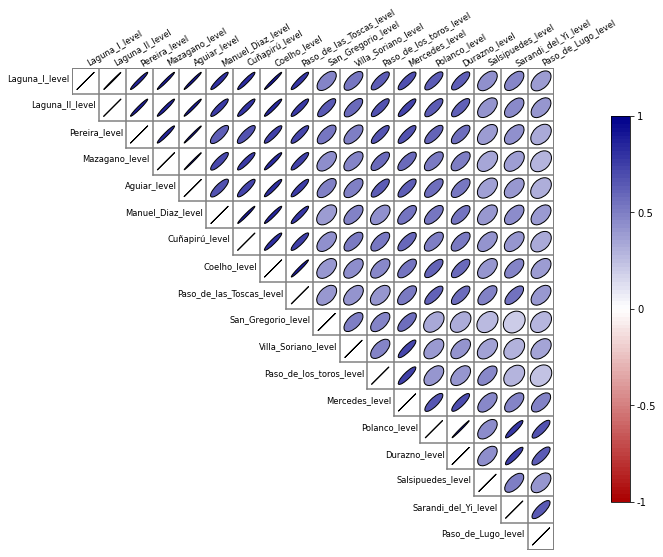

In [8]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

mtx_corr = niveis.corr()

corr = corrplot.Corrplot(mtx_corr)
corr.plot(upper='ellipse')

fig = plt.gcf()
fig.set_size_inches(20,10)
fig.show()

**Mapa de Calor**

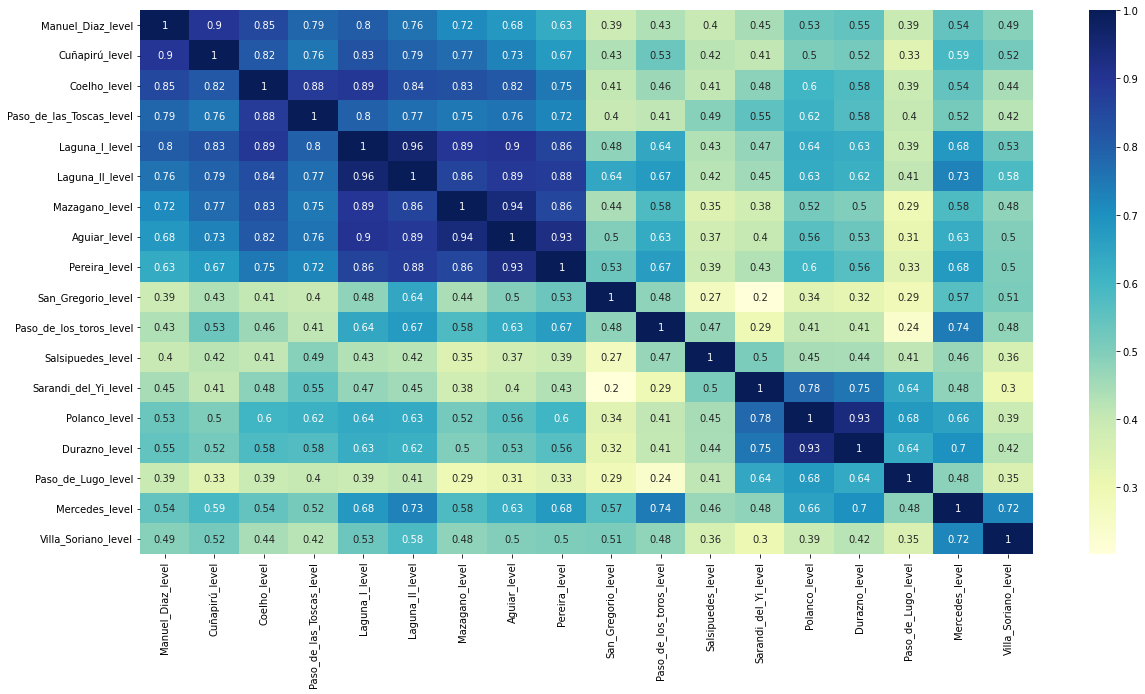

In [9]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

plt.figure(figsize=(20,10)) 
# plotting correlation heatmap
dataplot = sb.heatmap(niveis.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

#**Cross-Correlation**

###Função para calcular a correlação com Atraso

###O atraso é aplicado sempre a segunda lista datay

In [10]:
def crosscorr(datax, datay, lag=0):
    if (lag!=0):
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        corr = datax.corr(shiftedy)
        return corr
    else: 
        return datax.corr(datay.shift(lag))

Ex1: Correlações com Atraso entre Nível Olaria e Nivel Suspiro

In [11]:
ks = list(range(-750,750))#5 horas
corrs = []
for k in ks:
  corrs.append(crosscorr(niveis.iloc[:,0], niveis.iloc[:,1], k))
  
df= pd.DataFrame()

df['ks'] = ks
df['corrs'] = corrs

In [12]:
import plotly.express as px
data = px.data.gapminder()

#color_continuous_scale=[(0, "rgb(136,204,238)"),(0, "cornflowerblue"),(0.5, "blue"), (0.75, "#1616A7"), (1, "#0D2A63")]
fig = px.bar(df, x='ks', y='corrs',
             color='corrs', height=400, color_continuous_scale=[(0, "#0D2A63"),(0.25, "#1616A7"),(0.5, "blue"), (0.75, "cornflowerblue"), (1, "rgb(136,204,238)")])
fig.update_layout(
    title_text="Correlações com Atraso entre Nível Olaria e Nivel Suspiro <br><sup>Atrasos aplicados a Nivel Suspiro</sup>",
    font=dict(
        family="Arial",
        size=18,
        color="RebeccaPurple"
    ),
    legend=dict(
      yanchor="top",
      y=0.99,
      xanchor="left",
      x=0.01
    ),
    hovermode="closest"
   )
fig.add_shape(type='line',
                x0=0,
                y0=0,
                x1=0,
                y1=1,
                line=dict(
                    color="Red",
                    width=2,
                    dash="dot",
                ),
                xref='x',
                yref='y'
)
fig.show()

Ex2: Correlações com Atraso entre Nível Suspiro e Nivel Conselheiro Paulino

In [13]:
ks2 = list(range(-150,150))#5 horas
corrs2 = []
for k in ks2:
  corrs2.append(crosscorr(niveis.iloc[:,1], niveis.iloc[:,2], k))
df2= pd.DataFrame()

df2['ks'] = ks2
df2['corrs'] = corrs2

In [14]:
import plotly.express as px
data = px.data.gapminder()

#color_continuous_scale=[(0, "rgb(136,204,238)"),(0, "cornflowerblue"),(0.5, "blue"), (0.75, "#1616A7"), (1, "#0D2A63")]
#[(0, "rgb(136,204,238)"),(0.25, "cornflowerblue"),(0.5, "blue"), (0.75, "#1616A7"), (1, "#0D2A63")])
fig = px.bar(df2, x='ks', y='corrs',
             color='corrs', height=400, color_continuous_scale=[(0, "#0D2A63"),(0.25, "#1616A7"),(0.5, "blue"), (0.75, "cornflowerblue"), (1, "rgb(136,204,238)")])
fig.update_layout(
    title_text="Correlações com Atraso entre Nível Suspiro e Nivel Conselheiro Paulino <br><sup>Atrasos aplicados ao Nivel Conselheiro Paulino</sup>",
    font=dict(
        family="Arial",
        size=18,
        color="RebeccaPurple"
    ),
    legend=dict(
      yanchor="top",
      y=0.99,
      xanchor="left",
      x=0.01
    ),
    hovermode="closest"
   )
fig.add_shape(type='line',
                x0=0,
                y0=0,
                x1=0,
                y1=1,
                line=dict(
                    color="Red",
                    width=2,
                    dash="dot",
                ),
                xref='x',
                yref='y'
)
fig.show()

Ex3: Correlações com Atraso entre Nível Conselheiro Paulino e Nivel Venda das Pedras

In [15]:
ks3 = list(range(-150,150))#5 horas
corrs3 = []
for k in ks3:
  corrs3.append(crosscorr(niveis.iloc[:,2], niveis.iloc[:,3], k))
df3= pd.DataFrame()

df3['ks'] = ks3
df3['corrs'] = corrs3

In [16]:
import plotly.express as px
import plotly
data = px.data.gapminder()

#color_continuous_scale=[(0, "rgb(136,204,238)"),(0, "cornflowerblue"),(0.5, "blue"), (0.75, "#1616A7"), (1, "#0D2A63")]
fig = px.bar(df3, x='ks', y='corrs',
             color='corrs', height=400, color_continuous_scale=[(0, "#0D2A63"),(0.25, "#1616A7"),(0.5, "blue"), (0.75, "cornflowerblue"), (1, "rgb(136,204,238)")])
fig.update_layout(
    title_text="Correlações com Atraso entre Nível Conselheiro Paulino e Nivel Venda das Pedras <br><sup>Atrasos aplicados ao Nivel Venda das Pedras</sup>",
    font=dict(
        family="Arial",
        size=18,
        color="RebeccaPurple"
    ),
    legend=dict(
      yanchor="top",
      y=0.99,
      xanchor="left",
      x=0.01
    ),
    hovermode="closest"
   )
fig.add_shape(type='line',
                x0=0,
                y0=0,
                x1=0,
                y1=1,
                line=dict(
                    color="Red",
                    width=2,
                    dash="dot",
                ),
                xref='x',
                yref='y'
)
plotly.offline.iplot(fig, filename='filename.png')
#fig.show()

###Calculando Máximas Correlações para par a par:

In [17]:
import pandas as pd
max_corrs = pd.DataFrame().reindex_like(correlations)
max_ks = pd.DataFrame().reindex_like(correlations)

In [18]:
indexes = list(range(len(correlations.columns)))

In [19]:
ks = list(range(-150,150))
for i in indexes:
  for j in indexes:
    max_k=0
    max_corr=-1
    ks = list(range(-150,150))
    for k in ks:
      corr = crosscorr(niveis.iloc[:,i], niveis.iloc[:,j], k)
      if(max_corr < corr):
        max_corr = corr
        max_k = k
    max_corrs.iloc[i,j]=max_corr
    max_ks.iloc[i,j]=max_k

In [20]:
list_of_max_corrs = []
list_of_max_ks = []

for i in indexes:
  for j in indexes:
      list_of_max_corrs.append(max_corrs.iloc[i,j])
      list_of_max_ks.append(max_ks.iloc[i,j])

###Máximas correlações

In [21]:
max_corrs

,Manuel_Diaz_level,Cuñapirú_level,Coelho_level,Paso_de_las_Toscas_level,Laguna_I_level,Laguna_II_level,Mazagano_level,Aguiar_level,Pereira_level,San_Gregorio_level,Paso_de_los_toros_level,Salsipuedes_level,Sarandi_del_Yi_level,Polanco_level,Durazno_level,Paso_de_Lugo_level,Mercedes_level,Villa_Soriano_level
Manuel_Diaz_level,1.000000,0.895992,0.851066,0.786212,0.804885,0.760221,0.715811,0.679577,0.632175,0.414434,0.434438,0.400245,0.446133,0.534269,0.545705,0.393075,0.543846,0.490182
Cuñapirú_level,0.895992,1.000000,0.815379,0.756100,0.826184,0.791759,0.772932,0.729488,0.674332,0.441319,0.529997,0.417084,0.410196,0.503126,0.518306,0.332981,0.590594,0.517995
Coelho_level,0.851066,0.815379,1.000000,0.883891,0.892141,0.839368,0.832060,0.815537,0.749856,0.457584,0.462573,0.408012,0.482471,0.601865,0.580194,0.390385,0.542615,0.444343
Paso_de_las_Toscas_level,0.786212,0.756100,0.883891,1.000000,0.796020,0.766969,0.749891,0.758221,0.723790,0.478192,0.411427,0.489312,0.553253,0.616423,0.575542,0.402857,0.516287,0.420760
Laguna_I_level,0.804885,0.826184,0.892141,0.796020,1.000000,0.958589,0.894619,0.900444,0.862392,0.489846,0.639053,0.430324,0.470714,0.635237,0.626894,0.389868,0.681257,0.532105
Laguna_II_level,0.760221,0.791759,0.839368,0.766969,0.958589,1.000000,0.861662,0.890705,0.879367,0.643283,0.674589,0.420677,0.454705,0.633851,0.617719,0.408376,0.731288,0.584830
Mazagano_level,0.715811,0.772932,0.832060,0.749891,0.894619,0.861662,1.000000,0.942897,0.856179,0.463367,0.579839,0.347295,0.376638,0.518239,0.500410,0.290777,0.580628,0.482011
Aguiar_level,0.679577,0.729488,0.815537,0.758221,0.900444,0.890705,0.942897,1.000000,0.925887,0.518688,0.633754,0.374184,0.401908,0.563233,0.529665,0.314899,0.627704,0.495464
Pereira_level,0.632175,0.674332,0.749856,0.723790,0.862392,0.879367,0.856179,0.925887,1.000000,0.548500,0.671038,0.389652,0.431389,0.603574,0.564616,0.333405,0.677478,0.502907
San_Gregorio_level,0.413481,0.440764,0.443441,0.458555,0.489130,0.643283,0.462702,0.518039,0.547646,1.000000,0.479709,0.268012,0.222511,0.365578,0.347769,0.314833,0.566625,0.505743


###Máximos ks(atrasos)

In [22]:
max_ks

,Manuel_Diaz_level,Cuñapirú_level,Coelho_level,Paso_de_las_Toscas_level,Laguna_I_level,Laguna_II_level,Mazagano_level,Aguiar_level,Pereira_level,San_Gregorio_level,Paso_de_los_toros_level,Salsipuedes_level,Sarandi_del_Yi_level,Polanco_level,Durazno_level,Paso_de_Lugo_level,Mercedes_level,Villa_Soriano_level
Manuel_Diaz_level,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cuñapirú_level,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Coelho_level,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Paso_de_las_Toscas_level,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Laguna_I_level,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Laguna_II_level,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mazagano_level,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aguiar_level,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pereira_level,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
San_Gregorio_level,2.0,1.0,2.0,32.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,31.0,1.0,1.0,1.0,0.0,0.0
